<a href="https://colab.research.google.com/github/Jacobgokul/ML-Playground/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

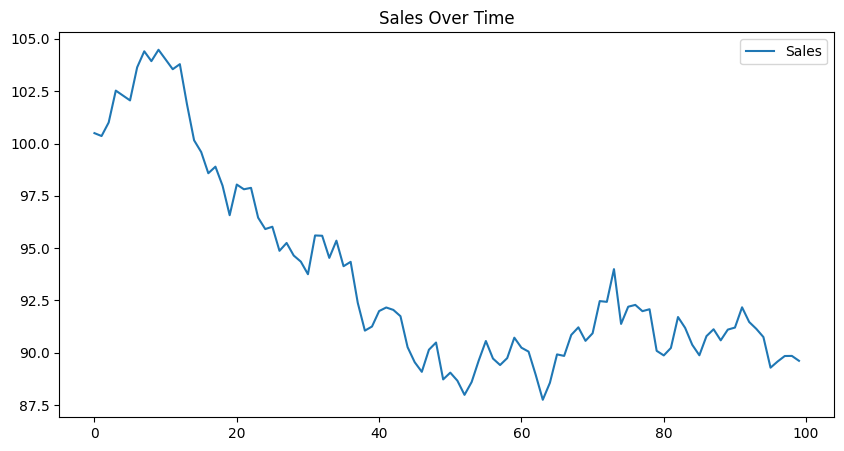

In [2]:
# Create a simple sales dataset (hypothetical)
np.random.seed(42)
data = np.cumsum(np.random.randn(100, 1)) + 100  # Cumulative sum for trend

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Sales'])
df.plot(title="Sales Over Time", figsize=(10, 5))
plt.show()


In [3]:
# Create sequences (lookback window of 5)
def create_sequences(data, lookback=5):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

# Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Create sequences
X, y = create_sequences(scaled_data)

# Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [4]:
# Define LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(25, activation='relu', return_sequences=False),
    Dense(1)  # Output Layer
])

# Compile Model
model.compile(optimizer='adam', loss='mse')

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 0.2093 - val_loss: 0.0247
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1798 - val_loss: 0.0180
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1906 - val_loss: 0.0111
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1190 - val_loss: 0.0047
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0794 - val_loss: 0.0029
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0221 - val_loss: 0.0226
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0206 - val_loss: 0.0142
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0171 - val_loss: 0.0070
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0107 - val_loss: 0.0057
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0092 - val_loss: 0.0029
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - val_loss: 0.0026
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0095 - val_

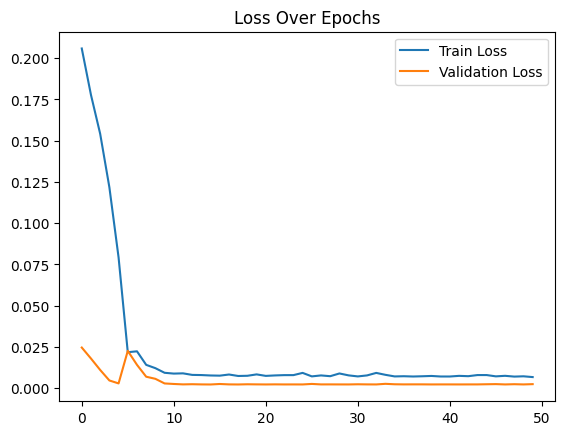

In [5]:
# Plot Training Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


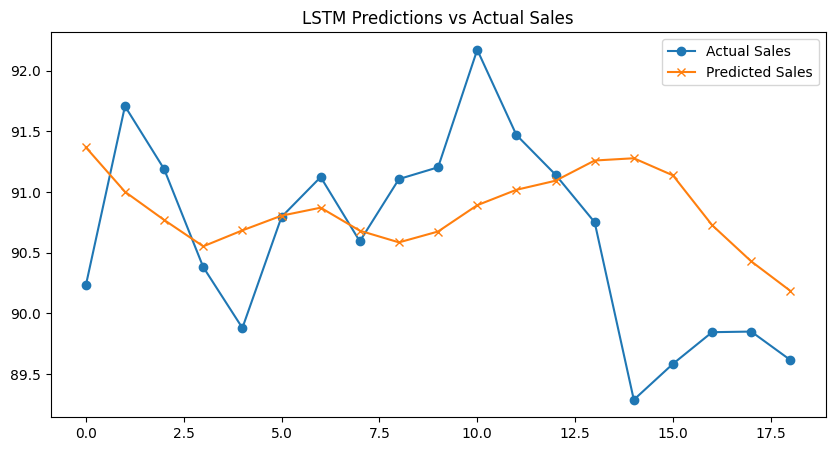

In [6]:
# Predict Test Data
y_pred = model.predict(X_test)

# Inverse Transform to Original Scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot Predictions vs Actual
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label="Actual Sales", marker='o')
plt.plot(y_pred_inv, label="Predicted Sales", marker='x')
plt.legend()
plt.title("LSTM Predictions vs Actual Sales")
plt.show()
